# Advanced Panda Operations

author: bhavesh patel

In [1]:
# load world energy data.
# Source: http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls

def load_energy_data():

    import pandas as pd
    import re

    # I could use lambda as follows but too many things to check.  So creating separate function: data_cleanup.
    # energy = pd.read_excel('Energy Indicators.xls', header=1, skiprows=16, skip_footer=38, na_values='...',
    #                       converters = {'Unnamed: 2' : lambda x : 
    #                                     "South Korea" if x=="Republic of Korea" else
    #                                     "United States" if x=="United States of America20" else
    #                                     "United Kingdom" if x== "United Kingdom of Great Britain and Northern Ireland" else
    #                                     "Hong Kong" if x=="China, Hong Kong Special Administrative Region" else
    #                                     x
    #                                    })

    def data_cleanup(x):
        # first strip additional numbers at the end.
        x = x.rstrip('1234567890')  # remove footnote numbers associated with some countries.
        x = re.sub('\(.+\)','',x)   # remove other info like 'Bolivia (Plurinational State of)' should be 'Bolivia',
        x = x.rstrip()              # remove blanks at the end of a string
        if x=="Republic of Korea":
            return "South Korea"
        elif x=="United States of America":
            return "United States"
        elif x== "United Kingdom of Great Britain and Northern Ireland": 
            return "United Kingdom"
        elif x=="China, Hong Kong Special Administrative Region":
            return "Hong Kong"
        else:
            return x


    # read excel and skip first 15 rows, line 16 is a header, skip 38 rows in footer.

    # I tried converting energy supply Gigjoules in the same forumla using: 
    # converters={'Petajoules' : lambda x : x*1000000}.  This ran into an issue."
    # The "..." should convert to NaN.  But that didn't work, as it converted "..." to "..." times 1000000!!!

    energy = pd.read_excel('http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls', 
                           sheetname='Energy',header=1, skiprows=16, skip_footer=38, na_values='...',
                            converters = {'Unnamed: 2' : lambda x : data_cleanup(x)})

    #rename columns,
    energy.columns= ['one','two','Country','Energy Supply', 'Energy Supply per Capita', '% Renewable']

    #get rid of first two columns.
    energy = energy[['Country','Energy Supply', 'Energy Supply per Capita', '% Renewable']]

    # Convert to Gigajoules.
    energy['Energy Supply'] = energy['Energy Supply'] * 1000000

    return energy

energy=load_energy_data()

energy

,Country,Energy Supply,Energy Supply per Capita,% Renewable
0,Afghanistan,3.210000e+08,10.0,78.669280
1,Albania,1.020000e+08,35.0,100.000000
2,Algeria,1.959000e+09,51.0,0.551010
3,American Samoa,NaN,NaN,0.641026
4,Andorra,9.000000e+06,121.0,88.695650
5,Angola,6.420000e+08,27.0,70.909090
6,Anguilla,2.000000e+06,136.0,0.000000
7,Antigua and Barbuda,8.000000e+06,84.0,0.000000
8,Argentina,3.378000e+09,79.0,24.064520
9,Armenia,1.430000e+08,48.0,28.236060


In [3]:
def load_gdp_data():
    # load world's gdp data.
    # Source: http://data.worldbank.org/indicator/NY.GDP.MKTP.CD

    import pandas as pd

    gdp = pd.read_excel('http://api.worldbank.org/v2/en/indicator/NY.GDP.MKTP.CD?downloadformat=excel', 
                        sheetname='Data',header=1, skiprows=2,
                        converters = {'Country Name' : lambda x : 
                                      "South Korea" if x=="Korea, Rep." else
                                      "Iran" if x=="Iran, Islamic Rep." else
                                      "Hong Kong" if x=="Hong Kong SAR, China" else
                                      x
                                     })

    # Use only the last 10 years (2006-2015) of GDP data.
    gdp_current_years=gdp[list(gdp.columns[0:1]) + list(gdp.columns[50:])]

    # drop year 2016 as it has no values.
    # We can use drop command.  Remember, axis=0 for rows and axis=1 for columns.
    gdp_current_years=gdp_current_years.drop('2016', axis=1)
    gdp_current_years=gdp_current_years.rename(columns={'Country Name':'Country'})
    #gdp_current_years
    return gdp_current_years

gdp_current_years=load_gdp_data()

gdp_current_years

,Country,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,2.421475e+09,2.623726e+09,2.791961e+09,2.498933e+09,2.467704e+09,2.584464e+09,NaN,NaN,NaN,NaN
1,Andorra,3.536633e+09,4.010991e+09,4.001201e+09,3.650083e+09,3.346517e+09,3.427023e+09,3.146152e+09,3.248925e+09,NaN,NaN
2,Afghanistan,7.057598e+09,9.843842e+09,1.019053e+10,1.248694e+10,1.593680e+10,1.793024e+10,2.053654e+10,2.004633e+10,2.005019e+10,1.933129e+10
3,Angola,4.178948e+10,6.044892e+10,8.417803e+10,7.549238e+10,8.247091e+10,1.041159e+11,1.153984e+11,1.249121e+11,1.267769e+11,1.026269e+11
4,Albania,8.992642e+09,1.070101e+10,1.288135e+10,1.204421e+10,1.192695e+10,1.289087e+10,1.231978e+10,1.278103e+10,1.321986e+10,1.139839e+10
5,Arab World,1.404103e+12,1.637573e+12,2.077761e+12,1.795462e+12,2.103839e+12,2.497297e+12,2.733908e+12,2.830820e+12,2.889755e+12,2.565871e+12
6,United Arab Emirates,2.221059e+11,2.579161e+11,3.154746e+11,2.535474e+11,2.860493e+11,3.485261e+11,3.734320e+11,3.885985e+11,4.019581e+11,3.702963e+11
7,Argentina,2.335817e+11,2.888333e+11,3.631375e+11,3.344904e+11,4.259161e+11,5.332003e+11,5.489346e+11,5.541552e+11,5.297262e+11,5.831686e+11
8,Armenia,6.384452e+09,9.206302e+09,1.166204e+10,8.647937e+09,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.052918e+10
9,American Samoa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
def load_scimago_data():
    import pandas as pd
    # now load Scimago Journal & Country Rank data.
    # http://www.scimagojr.com/countryrank.php?category=2102

    scima_country_rank = pd.read_excel('http://www.scimagojr.com/countryrank.php?category=2102&out=xls',
                                       sheetname='Sheet1')

    return scima_country_rank

scima_country_rank=load_scimago_data()

scima_country_rank

,Rank,Country,Documents,Citable documents,Citations,Self-citations,Citations per document,H index
0,1,China,127050,126767,597237,411683,4.70,138
1,2,United States,96661,94747,792274,265436,8.20,230
2,3,Japan,30504,30287,223024,61554,7.31,134
3,4,United Kingdom,20944,20357,206091,37874,9.84,139
4,5,Russian Federation,18534,18301,34266,12422,1.85,57
5,6,Canada,17899,17620,215003,40930,12.01,149
6,7,Germany,17027,16831,140566,27426,8.26,126
7,8,India,15005,14841,128763,37209,8.58,115
8,9,France,13153,12973,130632,28601,9.93,114
9,10,South Korea,11983,11923,114675,22595,9.57,104


In [6]:
def answer_one():
    import pandas as pd
    
    # Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). 
    # Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 
    #'Rank' (Rank 1 through 15).

    rank_energy = pd.merge(scima_country_rank,energy, how='inner', left_on='Country', right_on='Country')
    #The index of this DataFrame should be the name of the country.
    rank_energy_gdp = pd.merge(rank_energy, gdp_current_years, how='inner', 
                               left_on='Country', right_on='Country').set_index(['Country'])

    return rank_energy_gdp[0:15]

rank_energy_gdp=answer_one()

rank_energy_gdp

,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93.0,19.754910,2.752132e+12,3.552183e+12,4.598205e+12,5.109954e+12,6.100620e+12,7.572554e+12,8.560547e+12,9.607224e+12,1.048237e+13,1.100772e+13
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286.0,11.570980,1.385589e+13,1.447764e+13,1.471858e+13,1.441874e+13,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.803665e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149.0,10.232820,4.356750e+12,4.356348e+12,4.849185e+12,5.035142e+12,5.498718e+12,5.908989e+12,5.957250e+12,4.908863e+12,4.596157e+12,4.123258e+12
United Kingdom,4,20944,20357,206091,37874,9.84,139,7.920000e+09,124.0,10.600470,2.678278e+12,3.063005e+12,2.875463e+12,2.367127e+12,2.429603e+12,2.608995e+12,2.646003e+12,2.719509e+12,2.998834e+12,2.858003e+12
Russian Federation,5,18534,18301,34266,12422,1.85,57,3.070900e+10,214.0,17.288680,9.899305e+11,1.299705e+12,1.660844e+12,1.222644e+12,1.524916e+12,2.034007e+12,2.154067e+12,2.231827e+12,2.052807e+12,1.331208e+12
Canada,6,17899,17620,215003,40930,12.01,149,1.043100e+10,296.0,61.945430,1.315415e+12,1.464977e+12,1.549131e+12,1.371153e+12,1.613406e+12,1.788703e+12,1.824289e+12,1.837443e+12,1.783776e+12,1.550537e+12
Germany,7,17027,16831,140566,27426,8.26,126,1.326100e+10,165.0,17.901530,3.002446e+12,3.439953e+12,3.752366e+12,3.418005e+12,3.417298e+12,3.757465e+12,3.543984e+12,3.752514e+12,3.879277e+12,3.363447e+12
India,8,15005,14841,128763,37209,8.58,115,3.319500e+10,26.0,14.969080,9.491168e+11,1.201072e+12,1.186913e+12,1.323896e+12,1.656562e+12,1.822990e+12,1.828985e+12,1.863208e+12,2.042439e+12,2.095398e+12
France,9,13153,12973,130632,28601,9.93,114,1.059700e+10,166.0,17.020280,2.325012e+12,2.663113e+12,2.923466e+12,2.693827e+12,2.646995e+12,2.862502e+12,2.681416e+12,2.808511e+12,2.839162e+12,2.418836e+12



The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [7]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [8]:
def answer_two():
    import pandas as pd
    # let's find out the union of all 3.
    # Subtract the intersect of all 3 from union. That will give us how many entries we removed.

    # Union
    rank_energy_unioun = pd.merge(scima_country_rank,energy, how='outer', left_on='Country', right_on='Country')
    rank_energy_gdp_unioun = pd.merge(rank_energy_unioun, gdp_current_years, how='outer', left_on='Country', right_on='Country').set_index(['Country'])

    # Calculate interset again, as its part of answer_one() function, not global.
    rank_energy_intetsect = pd.merge(scima_country_rank,energy, how='inner', left_on='Country', right_on='Country')
    rank_energy_gdp_intetsect = pd.merge(rank_energy_intetsect, gdp_current_years, how='inner', 
                               left_on='Country', right_on='Country').set_index(['Country'])

    # Nunber of entries we removed are:
    ent_removed=rank_energy_gdp_unioun.shape[0]-rank_energy_gdp_intetsect.shape[0]
    return ent_removed

answer_two()


156

What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [9]:
def answer_three():
    import pandas as pd
    import numpy as np
    def avgval(data):
        sel_columns=data[['2006',
                         '2007',
                         '2008',
                         '2009',
                         '2010',
                         '2011',
                         '2012',
                         '2013',
                         '2014',
                         '2015']]
        return pd.Series({'avgGDP0615': np.mean(sel_columns)})

    avgGDP=rank_energy_gdp.apply(avgval, axis=1)
    avgGDPSorted = avgGDP.sort_values(['avgGDP0615'], ascending=False)
    return avgGDPSorted['avgGDP0615']

avgGDP=answer_three()
#type(avgGDP)
avgGDP

Country
United States         1.562297e+13
China                 6.934351e+12
Japan                 4.959066e+12
Germany               3.532675e+12
United Kingdom        2.724482e+12
France                2.686284e+12
Italy                 2.129754e+12
Brazil                1.980922e+12
Russian Federation    1.650196e+12
Canada                1.609883e+12
India                 1.597058e+12
Spain                 1.408716e+12
Australia             1.200847e+12
South Korea           1.165321e+12
Iran                  4.418080e+11
Name: avgGDP0615, dtype: float64

By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [11]:
def answer_four():
    import pandas as pd
    gdpchgcountry = pd.DataFrame(avgGDP)
    gdpchgcountry['Country']=gdpchgcountry.index
    x=gdpchgcountry.iloc[5]['Country']
    no5gdp=rank_energy_gdp[rank_energy_gdp.index==x]

    chg=no5gdp['2015']-no5gdp['2006']    
    return chg[0]
gdpchg6=answer_four()

gdpchg6

93823614678.845703

What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [12]:
def answer_five():
    import numpy as np
    return np.mean(rank_energy_gdp['Energy Supply per Capita'])

meanengpercap = answer_five()

meanengpercap

157.59999999999999

What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [13]:
def answer_six():
    rank_energy_sorted=rank_energy_gdp.sort_values(['% Renewable'], ascending=False)
    country=rank_energy_sorted.index[0]
    topren=rank_energy_sorted['% Renewable'][0]
    return (country, topren)

topren= answer_six()

topren

('Brazil', 69.648030000000006)

Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [14]:
def answer_seven():    
    rank_energy_gdp['SelfCitationRatio']=rank_energy_gdp['Self-citations']/rank_energy_gdp['Citations']
    rank_energy_gdp.sort_values(['SelfCitationRatio'], ascending=False)
    country=rank_energy_gdp.index[0]
    topren=rank_energy_gdp['SelfCitationRatio'][0]
    return (country, topren)

topren=answer_seven()
topren

('China', 0.68931261793894216)

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [15]:
def answer_eight():
    rank_energy_gdp['Estpop']=rank_energy_gdp['Energy Supply']/rank_energy_gdp['Energy Supply per Capita']
    rank_energy_sorted=rank_energy_gdp.sort_values(['Estpop'], ascending=False)
    country=rank_energy_sorted.index[2]
    return country

topren=answer_eight()
topren

'United States'

Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [16]:
def answer_nine():
    rank_energy_gdp['EstCitperPerson']=rank_energy_gdp['Citable documents']/rank_energy_gdp['Estpop']
    return rank_energy_gdp['EstCitperPerson'].corr(rank_energy_gdp['Energy Supply per Capita'])

corrval=answer_nine()
corrval

0.79400104354429457

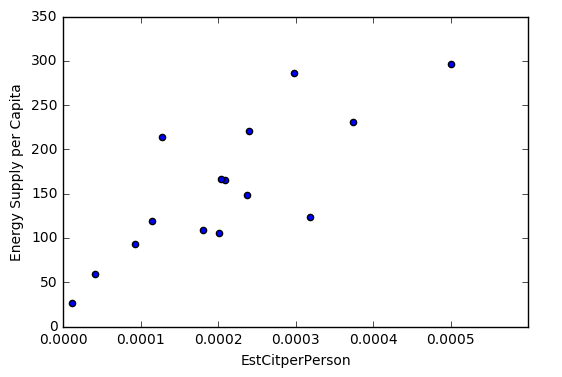

In [17]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    rank_energy_gdp.plot(x='EstCitperPerson', y='Energy Supply per Capita', kind='scatter', xlim=[0, 0.0006])
    
plot9()

Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [18]:
def answer_ten():
    import numpy as np
    import pandas as pd
    renMedian=np.median(rank_energy_gdp['% Renewable'])
    rank_energy_gdp['RenEnergyState']=rank_energy_gdp.apply(lambda row: 1 if row['% Renewable'] >= renMedian else 0, axis=1)
    rank_energy_sorted = rank_energy_gdp.sort_values(['Rank'])
    #HighRenew = pd.Series(rank_energy_sorted.index)
    return rank_energy_sorted['Rank']

country_list=answer_ten()

#type(country_list)
country_list

Country
China                  1
United States          2
Japan                  3
United Kingdom         4
Russian Federation     5
Canada                 6
Germany                7
India                  8
France                 9
South Korea           10
Italy                 11
Spain                 12
Iran                  13
Australia             14
Brazil                15
Name: Rank, dtype: int64

Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [19]:
def answer_eleven():    
    import pandas as pd
    import numpy as np
    ContinentDict  = {'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'}

    rank_energy_gdp['Country']=rank_energy_gdp.index
    rank_energy_gdp['Continent']=rank_energy_gdp.apply(lambda row: ContinentDict[row['Country']], axis=1)

    return (rank_energy_gdp.set_index('Continent')
                    .groupby(level=0)['Estpop']
                     .agg({'size' : np.count_nonzero,
                           'sum' : np.sum,
                           'mean' : np.average,
                           'std' : np.std
                          }))

ans_ele=answer_eleven()

ans_ele

,mean,std,size,sum
Continent,,,,
Asia,5.797333e+08,6.790979e+08,5.0,2.898666e+09
Australia,2.331602e+07,NaN,1.0,2.331602e+07
Europe,7.632161e+07,3.464767e+07,6.0,4.579297e+08
North America,1.764276e+08,1.996696e+08,2.0,3.528552e+08
South America,2.059153e+08,NaN,1.0,2.059153e+08


Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [20]:
def answer_twelve():
    import pandas as pd
    import numpy as np

    rank_energy_gdp['renewablecategory']=pd.cut(rank_energy_gdp['% Renewable'],5)
    rank_sorted=rank_energy_gdp.sort_values(['Continent','renewablecategory'], ascending=[True,True])
    return rank_sorted.groupby(['Continent', 'renewablecategory'])['Country'].count()

ans_12=answer_twelve()
#type(ans_12)
ans_12

Continent      renewablecategory
Asia           (2.212, 15.753]      4
               (15.753, 29.227]     1
Australia      (2.212, 15.753]      1
Europe         (2.212, 15.753]      1
               (15.753, 29.227]     3
               (29.227, 42.701]     2
North America  (2.212, 15.753]      1
               (56.174, 69.648]     1
South America  (56.174, 69.648]     1
Name: Country, dtype: int64

Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [21]:
def answer_thirteen():
    return rank_energy_gdp['Estpop'].apply(lambda row: '{:,}'.format(row))

ans_13=answer_thirteen()
ans_13

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: Estpop, dtype: object


Use the built in function `plot_optional()` to see an example visualization.

Visualization: % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


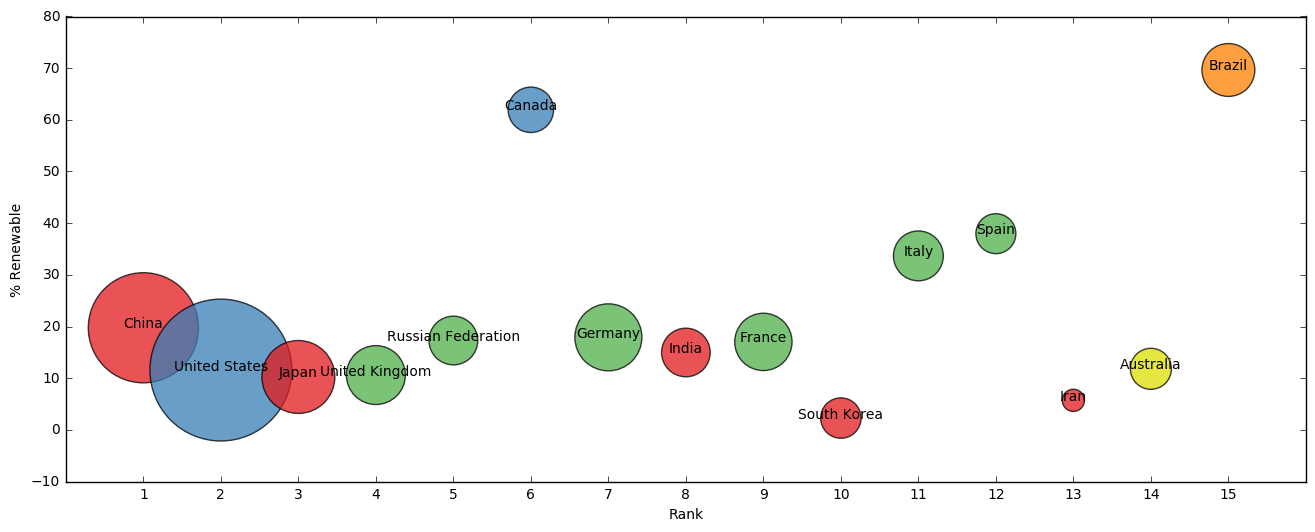

In [23]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    #Top15 = answer_one()
    ax = rank_energy_gdp.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*rank_energy_gdp['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(rank_energy_gdp.index):
        ax.annotate(txt, [rank_energy_gdp['Rank'][i], rank_energy_gdp['% Renewable'][i]], ha='center')

    print("Visualization: % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")
    
plot_optional()